**Setting the working directory**

In [1]:
import os
os.chdir('/Users/shovonsengupta/Desktop/Python/Notebook')

In [2]:
!pwd

/Users/shovonsengupta/Desktop/Python/Notebook


In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

**Dataset**

The CIFAR-10 dataset contains 60,000 32 × 32 color images in 10 classes, with 6,000 images per class.  There are 50,000 training images and 10,000 test images. The dataset is divided into five training  batches and one test batch, each with 10,000 images. The test batch contains exactly 1,000 randomly  selected images from each class. The training batches contain the remaining images in random  order, but some training batches may contain more images from one class than another. Between  them, the training batches contain exactly 5,000 images from each class.  The classes are completely mutually exclusive. There is no overlap between automobiles and  trucks. ‘Automobile’ includes sedans, SUVs and so on. ‘Truck’ includes only big trucks. ‘Neither’  includes pickup trucks.

In [5]:
import keras as k
import tensorflow as tf
print("Keras Version: ", k.__version__)
print("Tensorflow Version: ", tf.__version__)

Keras Version:  2.4.3
Tensorflow Version:  2.3.1


**Import relevant packages**

In [10]:
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  
from  __future__  import print_function  
import keras  
from keras.models import Sequential  
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten  
from keras.datasets import cifar10  

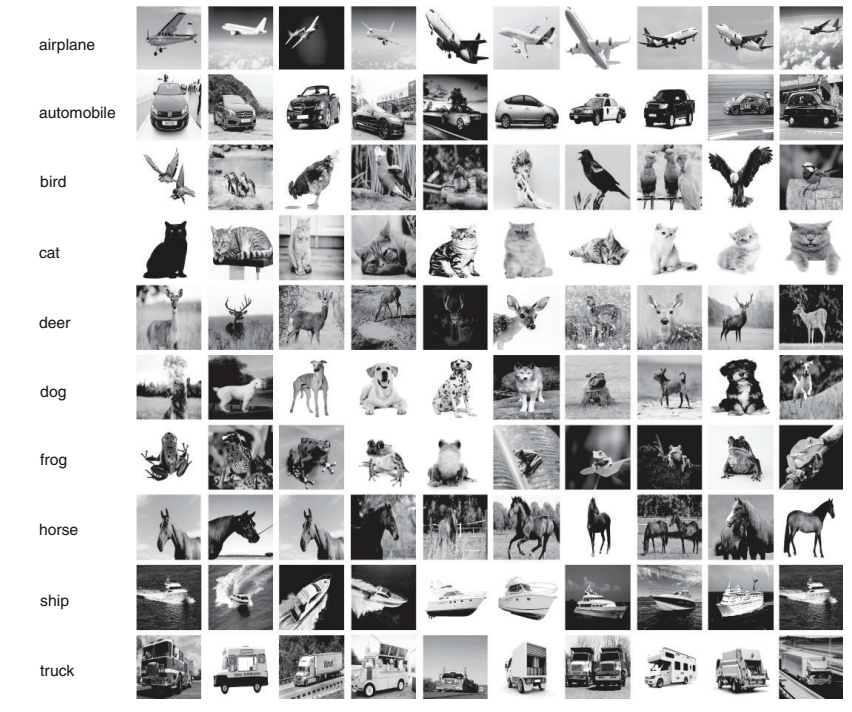

In [63]:
from IPython.display import Image
Image(filename='/Users/shovonsengupta/Desktop/All/PayPal - workshop/CIFAR_10.png',width=600, height=300)

In [11]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) =  cifar10.load_data()  

Then we explore the data and find the number of images in training and test data and the number of  classes. Once loading and exploring of data is completed, the data is preprocessed. Preprocessing of  data includes normalization of data and converting the labels to categorical variables.

In [13]:
(train_images, train_labels), (test_images, test_labels) =  cifar10.load_data()  
from keras.utils import to_categorical  
print('Shape of Training: ', train_images.shape,  train_labels.shape)  
print('Shape of Testing data: ', test_images.shape,  test_labels.shape)

Shape of Training:  (50000, 32, 32, 3) (50000, 1)
Shape of Testing data:  (10000, 32, 32, 3) (10000, 1)


In [14]:
#Find the unique numbers from the train labels
classes = np.unique(train_labels)
no_of_Classes = len(classes)
print('Total number of outputs: ', no_of_Classes)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


In [15]:
'''Find the shape of input images and create the variable  input_shape'''

'Find the shape of input images and create the variable  input_shape'

In [16]:
no_of_rows,no_of_cols,no_of_dims = train_images.shape[1:]
training_Data = train_images.reshape(train_images.shape[0], no_of_rows, no_of_cols, no_of_dims)
testing_Data = test_images.reshape(test_images.shape[0], no_of_rows, no_of_cols, no_of_dims)  
input_shape = (no_of_rows, no_of_cols, no_of_dims)  
#Change the datatype to float  
training_Data = training_Data.astype('float32')  
testing_Data = testing_Data.astype('float32')  
#Scale the data to lie between 0 to 1  
training_Data /= 255  
testing_Data /= 255  
#Change the labels from integer to categorical data  
train_Labels = to_categorical(train_labels)  
test_Labels = to_categorical(test_labels) 

In [17]:
#Display the change for category label using one-hot encoding  
print('Original label 0: ', train_labels[0])  
print('On conversion to categorical (one-hot): ', train_Labels[0]) 

Original label 0:  [6]
On conversion to categorical (one-hot):  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Build the Model**

In [21]:
def createModel():  
    model = Sequential()  
    #The first two layers with 32 filters of window size 3x3  
    model.add(Conv2D(32, (3, 3), padding='same',  activation='relu',  input_shape=input_shape))  
    model.add(Conv2D(32, (3, 3), activation='relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25)) 
     
    model.add(Conv2D(64, (3, 3), padding='same',  activation='relu'))  
    model.add(Conv2D(64, (3, 3), activation='relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))  
    
    model.add(Conv2D(64, (3, 3), padding='same',  activation='relu'))  
    model.add(Conv2D(64, (3, 3), activation='relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))
      
    model.add(Flatten())  
    model.add(Dense(512, activation='relu'))  
    model.add(Dropout(0.5))  
    model.add(Dense(no_of_Classes, activation='softmax')) 
    return model
model_one = createModel()
# print(model_one.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [22]:
batch_size = 3  
epochs = 3  
model_one.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])
print(model_one.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [23]:
history = model_one.fit(training_Data, 
                        train_Labels, 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        verbose=1, 
                        validation_data=(testing_Data, test_Labels))

Epoch 1/3
16667/16667 [==============================] - 239s 14ms/step - loss: 1.9639 - accuracy: 0.2968 - val_loss: 1.8211 - val_accuracy: 0.3173
Epoch 2/3
16667/16667 [==============================] - 228s 14ms/step - loss: 2.1988 - accuracy: 0.2121 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 3/3
16667/16667 [==============================] - 222s 13ms/step - loss: 2.3070 - accuracy: 0.0970 - val_loss: 2.3031 - val_accuracy: 0.1000


In [24]:
model_one.evaluate(testing_Data, test_Labels)

313/313 [==============================] - 3s 9ms/step - loss: 2.3031 - accuracy: 0.1000


[2.3031423091888428, 0.10000000149011612]

In [25]:
model_one.predict(testing_Data)

array([[0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387],
       [0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387],
       [0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387],
       ...,
       [0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387],
       [0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387],
       [0.10311415, 0.10113542, 0.09984473, ..., 0.10236461, 0.09488194,
        0.09877387]], dtype=float32)

**Performance Metrics**

Text(0, 0.5, 'Accuracy')

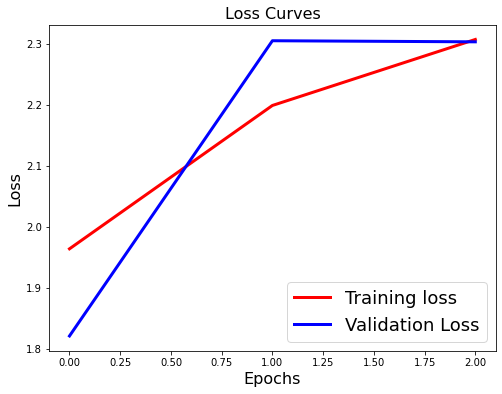

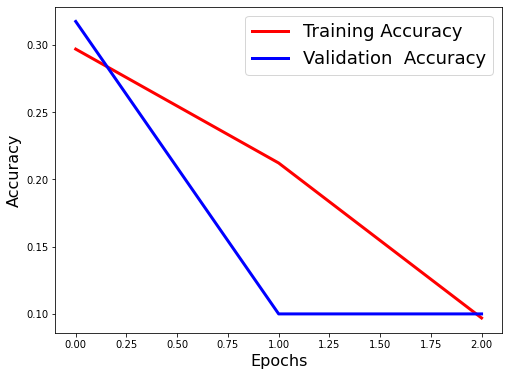

In [28]:
#Loss Curves  
plt.figure(figsize=[8,6])  
plt.plot(history.history['loss'],'r',linewidth=3.0)  
plt.plot(history.history['val_loss'],'b',linewidth=3.0)  
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)  
plt.xlabel('Epochs',fontsize=16)  
plt.ylabel('Loss',fontsize=16)  
plt.title('Loss Curves',fontsize=16)  

#Accuracy Curves  
plt.figure(figsize=[8,6])  
plt.plot(history.history['accuracy'],'r',linewidth=3.0)  
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)  
plt.legend(['Training Accuracy', 'Validation  Accuracy'],fontsize=18)  
plt.xlabel('Epochs',fontsize=16)  
plt.ylabel('Accuracy',fontsize=16) 

**Making sense of CNN!**

Inspired by the Book: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition by Aurelien Geron

**Utilities**

In [29]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

**What it is all about Convolution**

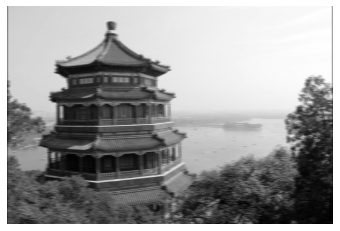

In [30]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

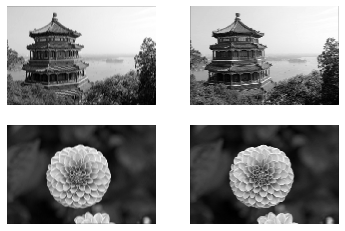

In [31]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [32]:
def crop(images):
    return images[150:220, 130:250]

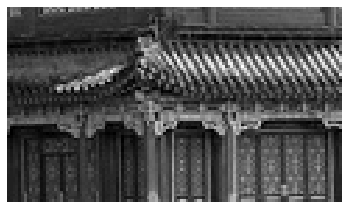

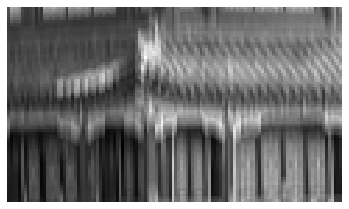

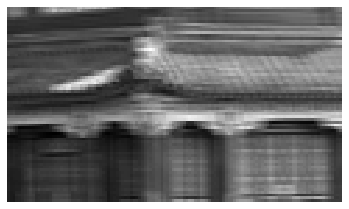

In [35]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

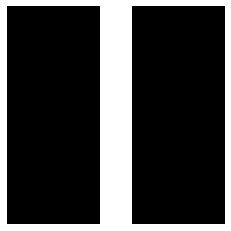

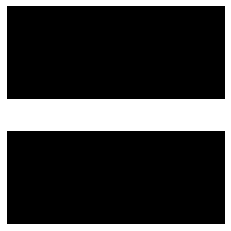

In [36]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

**Convolutional Layer**

In [37]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

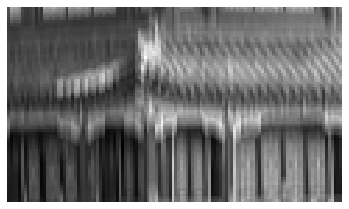

In [38]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

**Difference between VALID Vs SAME Padding**

In [39]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [40]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [41]:
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

Using "SAME" padding is equivalent to padding manually using manual_same_padding() then using "VALID" padding (confusingly, "VALID" padding means no padding at all):

In [42]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))

# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

**Pooling layer**

In [43]:
# Max Pooling
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [44]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

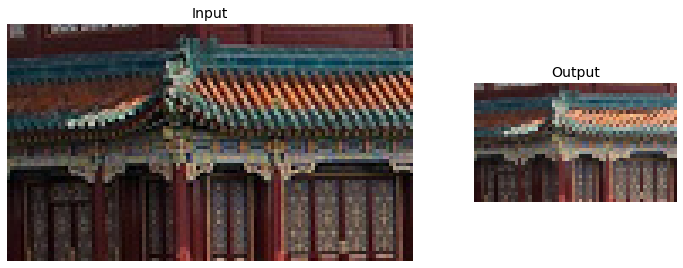

In [47]:
%matplotlib inline
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
# save_fig("china_max_pooling")
plt.show()

**Depth-wise pooling**

In [48]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [49]:
depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

In [50]:
# Or just use a Lambda layer:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

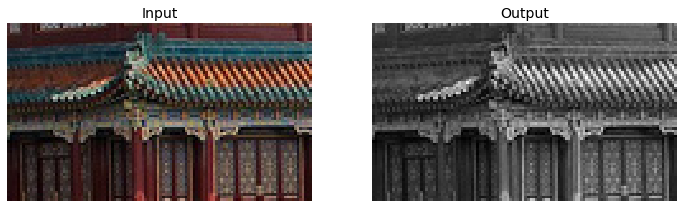

In [51]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # plot the 1st image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # plot the output for the 1st image
plt.axis("off")
plt.show()

In [52]:
# Average pooling
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [53]:
output_avg = avg_pool(cropped_images)

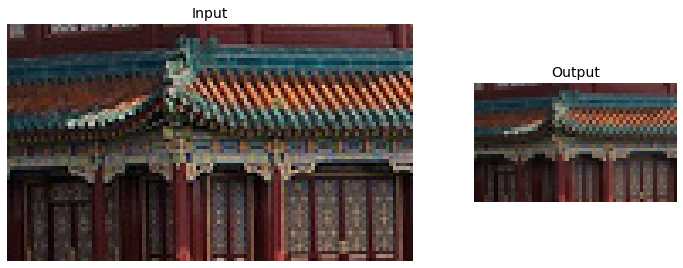

In [54]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [55]:
# Global Average Pooling
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788801 , 0.22507527, 0.20967631],
       [0.51287866, 0.4595188 , 0.3342377 ]], dtype=float32)>

In [56]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788801 , 0.22507527, 0.20967631],
       [0.51287866, 0.4595188 , 0.3342377 ]], dtype=float32)>

**Classification of Fashion MNIST Data using CNN**

In [57]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [59]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [60]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 256)        

In [61]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 247s 144ms/step - loss: 0.7214 - accuracy: 0.7543 - val_loss: 0.3520 - val_accuracy: 0.8710
Epoch 2/10
1719/1719 [==============================] - 239s 139ms/step - loss: 0.4193 - accuracy: 0.8602 - val_loss: 0.3617 - val_accuracy: 0.8720
Epoch 3/10
1719/1719 [==============================] - 238s 139ms/step - loss: 0.3588 - accuracy: 0.8795 - val_loss: 0.2972 - val_accuracy: 0.8896
Epoch 4/10
1719/1719 [==============================] - 232s 135ms/step - loss: 0.3209 - accuracy: 0.8917 - val_loss: 0.2764 - val_accuracy: 0.8974
Epoch 5/10
1719/1719 [==============================] - 229s 133ms/step - loss: 0.3015 - accuracy: 0.8986 - val_loss: 0.2776 - val_accuracy: 0.8940
Epoch 6/10
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2861 - accuracy: 0.9033 - val_loss: 0.2723 - val_accuracy: 0.9046
Epoch 7/10
1719/1719 [==============================] - 236s 137ms/step - loss: 0.2749 - accuracy: 0.9058 - val_

In [62]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 256)        

**Save the Model**

In [64]:
model.save('/Users/shovonsengupta/Desktop/All/PayPal - workshop/netron_model_cnn_Fashion_MNIST.h5')

**Visualize the Model Architecture**

***Use Netron Visualizer***
For Installation detail , please visit: https://github.com/lutzroeder/netron

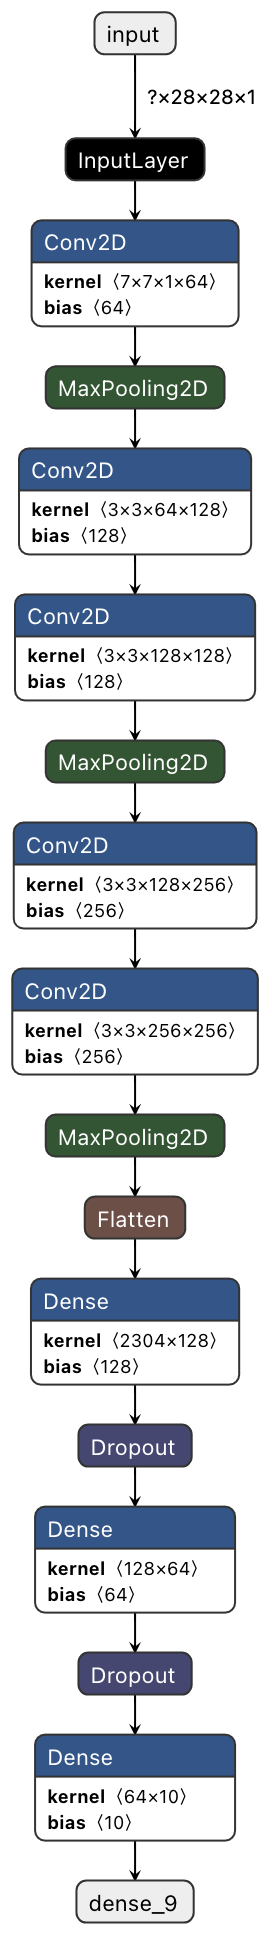

In [66]:
from IPython.display import Image
Image(filename='/Users/shovonsengupta/Desktop/All/PayPal - workshop/netron_model_cnn_Fashion_MNIST.png',
      width=600, height=300)

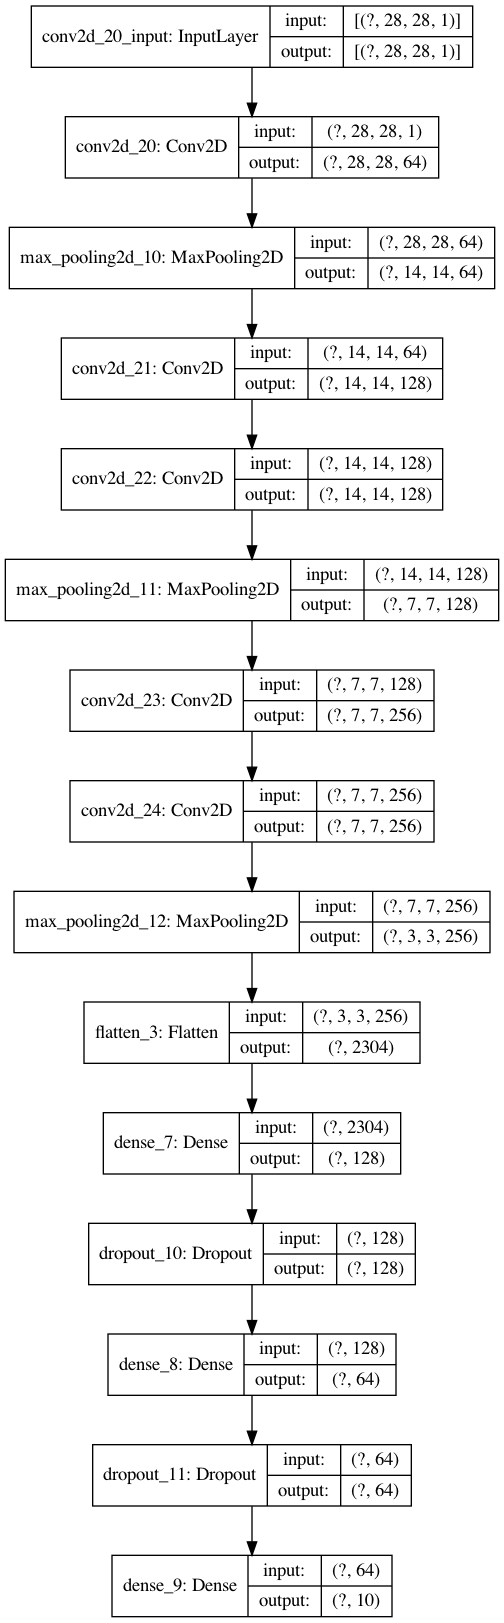

In [65]:
# Alternative Visualization
# Visualize the Network
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

**ResNet-34**

In [67]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)


In [68]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

**Transfer Learning: Use a pre-trained Model**

In [70]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 9s 0us/step


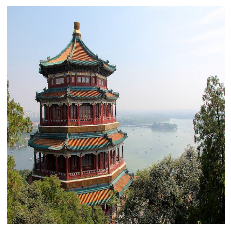

In [71]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


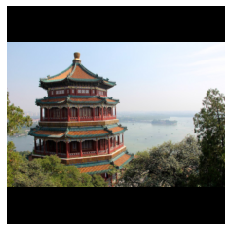

In [72]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

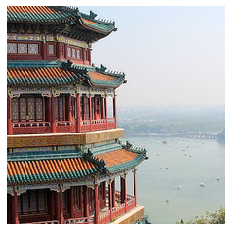

In [73]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()

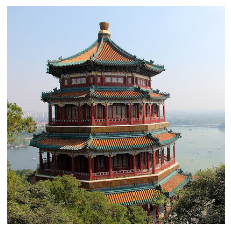

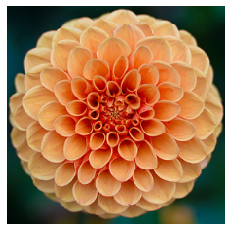

In [74]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [75]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

In [76]:
Y_proba.shape

(2, 1000)

In [77]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



**More Application**

**Objective: ** Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the MNIST Kaggle competition (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in this post). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, use a learning schedule such as 1-cycle, and possibly create an ensemble.

In [78]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [79]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 102s 59ms/step - loss: 0.1975 - accuracy: 0.9397 - val_loss: 0.0497 - val_accuracy: 0.9860
Epoch 2/10
1719/1719 [==============================] - 101s 59ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0423 - val_accuracy: 0.9884
Epoch 3/10
1719/1719 [==============================] - 98s 57ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0356 - val_accuracy: 0.9902
Epoch 4/10
1719/1719 [==============================] - 104s 60ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0322 - val_accuracy: 0.9924
Epoch 5/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0332 - val_accuracy: 0.9922
Epoch 6/10
1719/1719 [==============================] - 107s 62ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.0386 - val_accuracy: 0.9906
Epoch 7/10
1719/1719 [==============================] - 100s 58ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.

[0.026124222204089165, 0.9926999807357788]

**Another Example**

In [80]:
import numpy as np
# Method 2 : Use Keras inbuilt functions
from keras.datasets import cifar10

from keras.layers import Dense,Activation,Conv2D,\
    MaxPool2D,BatchNormalization,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,confusion_matrix

import time

In [81]:
# Data preparation stage
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_2 = np.zeros((np.shape(y_train)[0], 10))
y_train_2[np.arange(np.shape(y_train)[0]), np.ndarray.flatten(y_train)] = 1

y_test_2 = np.zeros((np.shape(y_test)[0], 10))
y_test_2[np.arange(np.shape(y_test)[0]), np.ndarray.flatten(y_test)] = 1

In [82]:
# Number of data points to keep for training due to memory constraint
num_dpoints = 20000

x_train = x_train[:num_dpoints, :]
y_train_2 = y_train_2[:num_dpoints, :]

print(x_train.shape,y_train_2.shape,x_test.shape,y_test_2.shape)

(20000, 32, 32, 3) (20000, 10) (10000, 32, 32, 3) (10000, 10)


In [83]:
def CNN_Classification_KS(_keep_prob):

    model = Sequential()
    # Layer 1
    model.add(Conv2D(64,(5,5),padding='same',input_shape=(32,32,3) ) )
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    # Layer 2
    model.add(Conv2D(128,(5,5),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    # Layer 3
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    # Flattening Layer
    model.add(Flatten())
    # Dense Layer 1
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(1-_keep_prob))
    model.add(BatchNormalization())
    # Dense Layer 2
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(1-_keep_prob))
    model.add(BatchNormalization())
    # Final output Layer
    model.add(Dropout(1-_keep_prob))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    adam_opt = Adam(lr=0.01)
    # Model compilation
    model.compile(loss='categorical_crossentropy',optimizer=adam_opt,metrics=['accuracy'])
    return model

In [84]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [85]:
# Model training
training_epochs = 10
batch_size = 512

cnn_class_model = CNN_Classification_KS(_keep_prob=0.5)

start_time = time.time()

cnn_class_model.fit(x_train,y_train_2,batch_size=batch_size,
                    epochs=training_epochs,verbose=1,validation_split=0.3)
end_time = time.time()

print("Seconds : ",round(end_time-start_time,3))

Epoch 1/10
28/28 [==============================] - 37s 1s/step - loss: 2.3414 - accuracy: 0.2177 - val_loss: 303.3654 - val_accuracy: 0.0962
Epoch 2/10
28/28 [==============================] - 41s 1s/step - loss: 1.8243 - accuracy: 0.3014 - val_loss: 43.7709 - val_accuracy: 0.1600
Epoch 3/10
28/28 [==============================] - 40s 1s/step - loss: 1.6790 - accuracy: 0.3547 - val_loss: 12.5561 - val_accuracy: 0.1217
Epoch 4/10
28/28 [==============================] - 39s 1s/step - loss: 1.5774 - accuracy: 0.4045 - val_loss: 3.0069 - val_accuracy: 0.2295
Epoch 5/10
28/28 [==============================] - 39s 1s/step - loss: 1.5060 - accuracy: 0.4418 - val_loss: 2.2501 - val_accuracy: 0.3195
Epoch 6/10
28/28 [==============================] - 39s 1s/step - loss: 1.4252 - accuracy: 0.4746 - val_loss: 2.2040 - val_accuracy: 0.3213
Epoch 7/10
28/28 [==============================] - 39s 1s/step - loss: 1.3365 - accuracy: 0.5085 - val_loss: 1.5919 - val_accuracy: 0.4535
Epoch 8/10
28/28

In [90]:
# Save the model
model.save('/Users/shovonsengupta/Desktop/All/PayPal - workshop/netron_model_cnn_CIFAR10.h5')

**Predictions**

In [87]:
y_train_pred = cnn_class_model.predict_classes(x_train)
y_test_pred = cnn_class_model.predict_classes(x_test)

y_train_cls = np.argmax(y_train_2,axis=1)
y_test_cls = np.argmax(y_test_2,axis=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
print("Train Confusion :\n")
print("CIFAR-10 Classification Train Confusion matrix :\n",confusion_matrix(y_train_cls,y_train_pred))
print("Test Confusion :\n")
print("CIFAR-10 Classification Test Confusion matrix :\n", confusion_matrix(y_test_cls,y_test_pred))

Train Confusion :

CIFAR-10 Classification Train Confusion matrix :
 [[ 996   21   93   30   36    4    2  109  224  474]
 [  17  521    0    6    3    1    1    5   20 1407]
 [ 132    6  431  287  424  121   13  303   68  257]
 [  18    0   32  577   91  351    0  364   37  541]
 [  41    3   68   83  843   32    6  738   18  177]
 [   5    0   12  265   56  746    1  516   18  306]
 [   4    6   38  331  389   32  317  256   35  630]
 [   5    0    5   37   28   58    0 1713    6  175]
 [  80   23    4   15    2    4    1   14 1277  592]
 [  17    8    0    5    1    2    0   26   13 1894]]
Test Confusion :

CIFAR-10 Classification Test Confusion matrix :
 [[483   6  52  17  20   5   1  59 123 234]
 [  8 271   0   2   4   1   2   4   6 702]
 [ 61   1 167 154 215  74  13 173  30 112]
 [ 17   2  23 247  57 160   9 197  21 267]
 [ 17   1  48  55 381  17   2 387  12  80]
 [  7   1  15 156  35 347   0 267  14 158]
 [  4   1  15 161 194  18 145 132  12 318]
 [  3   0   3  27  22  29   0 80

In [89]:
print("Completed!\n")
print("CIFAR-10 Classification Train Accuracy : ",round(accuracy_score(y_train_cls,y_train_pred),3))
print("CIFAR-10 Classification Test Accuracy : ",round(accuracy_score(y_test_cls,y_test_pred),3))

Completed!

CIFAR-10 Classification Train Accuracy :  0.466
CIFAR-10 Classification Test Accuracy :  0.442


**Other Application of CNN**

***Distinguishing Traffic Signs***

In [91]:
# Preparing image data
import numpy as np
import zipfile
import pprint

from skimage.transform import resize
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [92]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import (Flatten, Dense, Dropout)

In [93]:
import urllib.request
import os.path
if not os.path.exists("GTSRB_Final_Training_Images.zip"):
    url = ("https://sid.erda.dk/public/archives/"
    + "daaeac0d7ce1152aea9b61d9f1e19370/"
    + "GTSRB_Final_Training_Images.zip")
    filename = "./GTSRB_Final_Training_Images.zip"
    urllib.request.urlretrieve(url, filename)

In [94]:
IMG_SIZE = 32
TEST_SIZE = 0.2

In [95]:
X, Xt, y, yt = list(), list(), list(), list()

archive = zipfile.ZipFile(
          'GTSRB_Final_Training_Images.zip', 'r')
file_paths = [file for file in archive.namelist() 
              if '.ppm' in file]

for filename in file_paths:
    img = imread(archive.open(filename))
    img = resize(img, 
                 output_shape=(IMG_SIZE, IMG_SIZE),
                 mode='reflect')
    img_class = int(filename.split('/')[-2])
    
    if (hash(filename) % 1000) / 1000 > TEST_SIZE:
        X.append(img)
        y.append(img_class)
    else:
        Xt.append(img)
        yt.append(img_class)

archive.close()

In [96]:
test_ratio = len(Xt) / len(file_paths)
print("Train size:{} test size:{} ({:0.3f})".format(len(X), 
                len(Xt), 
                test_ratio))

Train size:31467 test size:7742 (0.197)


No classes:43


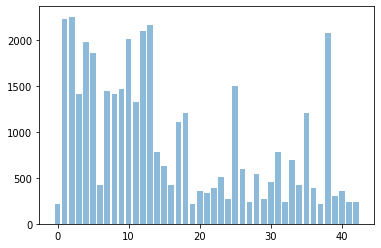

In [97]:
classes, dist = np.unique(y+yt, return_counts=True)
NUM_CLASSES = len(classes)
print ("No classes:{}".format(NUM_CLASSES))

plt.bar(classes, dist, align='center', alpha=0.5)
plt.show()

In [98]:
class_weight = {c:dist[c]/np.sum(dist) for c in classes}

In [99]:
# Running a classification task
batch_size = 256
tgen=ImageDataGenerator(rescale=1./255,
                        rotation_range=5,
                        width_shift_range=0.10, 
                        height_shift_range=0.10)

train_gen = tgen.flow(np.array(X), 
                      to_categorical(y), 
                      batch_size=batch_size)

In [100]:
vgen=ImageDataGenerator(rescale=1./255)

val_gen = vgen.flow(np.array(Xt), 
                    to_categorical(yt), 
                    batch_size=batch_size)

In [101]:
def small_cnn():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding='same',
                     input_shape=(IMG_SIZE, IMG_SIZE, 3),
                     activation='relu'))
    model.add(Conv2D(64, (5, 5), activation='relu'))   
    model.add(Flatten())
    model.add(Dense(768, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model


model = small_cnn()
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['accuracy'])

In [102]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=len(X) // batch_size,
                              validation_data=val_gen,
                              validation_steps=len(Xt) // batch_size,
                              class_weight=class_weight,
                              epochs=100, 
                              verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
122/122 - 99s - loss: 0.1122 - accuracy: 0.0688 - val_loss: 3.4873 - val_accuracy: 0.1230
Epoch 2/100
122/122 - 94s - loss: 0.1023 - accuracy: 0.1287 - val_loss: 3.1599 - val_accuracy: 0.1868
Epoch 3/100
122/122 - 94s - loss: 0.0848 - accuracy: 0.2398 - val_loss: 2.0667 - val_accuracy: 0.4290
Epoch 4/100
122/122 - 98s - loss: 0.0645 - accuracy: 0.3698 - val_loss: 1.5402 - val_accuracy: 0.5323
Epoch 5/100
122/122 - 103s - loss: 0.0540 - accuracy: 0.4414 - val_loss: 1.2656 - val_accuracy: 0.6049
Epoch 6/100
122/122 - 105s - loss: 0.0467 - accuracy: 0.5023 - val_loss: 1.0338 - val_accuracy: 0.6707
Epoch 7/100
122/122 - 109s - loss: 0.0400 - accuracy: 0.5636 - val_loss: 0.8439 - val_accuracy: 0.7324
Epoch 8/100
122/122 - 104s - loss: 0.0351 - accuracy: 0.6116 - val_loss: 0.7204 - val_accuracy: 0.7691
Epoch 9/100
122/122 - 94s - loss: 0.0307 - accuracy: 0.6520 - val_loss: 0.6416 - val_accuracy: 0.7977
Ep

Epoch 78/100
122/122 - 85s - loss: 0.0043 - accuracy: 0.9432 - val_loss: 0.0400 - val_accuracy: 0.9898
Epoch 79/100
122/122 - 86s - loss: 0.0040 - accuracy: 0.9448 - val_loss: 0.0412 - val_accuracy: 0.9906
Epoch 80/100
122/122 - 85s - loss: 0.0041 - accuracy: 0.9450 - val_loss: 0.0425 - val_accuracy: 0.9901
Epoch 81/100
122/122 - 84s - loss: 0.0040 - accuracy: 0.9453 - val_loss: 0.0392 - val_accuracy: 0.9910
Epoch 82/100
122/122 - 1328s - loss: 0.0040 - accuracy: 0.9483 - val_loss: 0.0373 - val_accuracy: 0.9926
Epoch 83/100
122/122 - 750s - loss: 0.0039 - accuracy: 0.9486 - val_loss: 0.0400 - val_accuracy: 0.9913
Epoch 84/100
122/122 - 87s - loss: 0.0039 - accuracy: 0.9474 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 85/100
122/122 - 88s - loss: 0.0037 - accuracy: 0.9485 - val_loss: 0.0454 - val_accuracy: 0.9878
Epoch 86/100
122/122 - 87s - loss: 0.0037 - accuracy: 0.9495 - val_loss: 0.0377 - val_accuracy: 0.9919
Epoch 87/100
122/122 - 89s - loss: 0.0035 - accuracy: 0.9528 - val_los

In [104]:
print("Best validation accuracy: {:0.3f}"
       .format(np.max(history.history['val_accuracy'])))

Best validation accuracy: 0.994


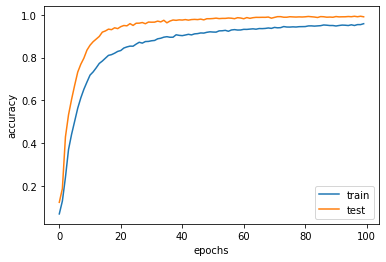

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy'); plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

**Application: LeNet**

In [106]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy

In [107]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [108]:
# transform targets into one-hot-encoded vectors
num_classes = len(np.unique(y_train))
print(y_train[0], end=' => ')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [109]:
# rescale 0-1 and cast training data as float32
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# reshape data to have also the channel dimension
img_rows, img_cols = X_train.shape[1:]
X_train = X_train.reshape(len(X_train), img_rows, img_cols, 1)
X_test = X_test.reshape(len(X_test), img_rows, img_cols, 1)

# notice the input shape
input_shape = (img_rows, img_cols, 1)
print(input_shape)

(28, 28, 1)


In [110]:
lenet = Sequential()

# Convolutional Layer C1
lenet.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', 
                 input_shape=input_shape, padding='same', name='C1'))

# Pooling Layer S2
lenet.add(AveragePooling2D(pool_size=(2, 2), name='S2'))

# Convolutional Layer C3
lenet.add(Conv2D(16, kernel_size=(5, 5), activation='tanh', name='C3'))

# Pooling Layer S4
lenet.add(AveragePooling2D(pool_size=(2, 2), name='S4'))

# Fully Connected Convolutional Layer C5
lenet.add(Conv2D(120, kernel_size=(5, 5), activation='tanh', name='C5'))

# Fully Connected Layer FC6
lenet.add(Flatten())
lenet.add(Dense(84, activation='tanh', name='FC6'))

#Output Layer (softmax activation)
lenet.add(Dense(10, activation='softmax', name='OUTPUT'))

In [111]:
lenet.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
lenet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)               

In [112]:
batch_size = 64
epochs = 50
history = lenet.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, 
                                       y_test))

Epoch 1/50
938/938 [==============================] - 12s 13ms/step - loss: 0.8723 - accuracy: 0.7837 - val_loss: 0.3924 - val_accuracy: 0.8912
Epoch 2/50
938/938 [==============================] - 12s 12ms/step - loss: 0.3506 - accuracy: 0.9007 - val_loss: 0.2932 - val_accuracy: 0.9154
Epoch 3/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2824 - accuracy: 0.9170 - val_loss: 0.2442 - val_accuracy: 0.9268
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2397 - accuracy: 0.9291 - val_loss: 0.2097 - val_accuracy: 0.9366
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2069 - accuracy: 0.9384 - val_loss: 0.1815 - val_accuracy: 0.9448
Epoch 6/50
938/938 [==============================] - 12s 13ms/step - loss: 0.1803 - accuracy: 0.9460 - val_loss: 0.1589 - val_accuracy: 0.9524
Epoch 7/50
938/938 [==============================] - 12s 12ms/step - loss: 0.1591 - accuracy: 0.9522 - val_loss: 0.1410 - val_accuracy:

In [114]:
lenet.save('/Users/shovonsengupta/Desktop/All/PayPal - workshop/netron_lenet_cnn_MNIST.h5')

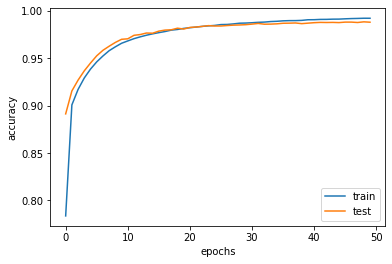

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy'); plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()